In [3]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
# Here we use a simple two-layer neural network (one hidden layer and one output layer)
# You need to adjust the number of nodes in the hidden layer and the learning rate based on your cross-validation results
hidden_layer_sizes = [60, 90, 100, 110, 500]
best_f1_score = 0
best_hidden_layer_size = 0

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=(size,), learning_rate_init=0.21, max_iter=1000, random_state=42)

    # Perform a 3-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro')
    avg_f1_score = np.mean(scores)
    print(f'Average F1-score for {size} nodes: {avg_f1_score}')

    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_hidden_layer_size = size

print(f'Best number of nodes in the hidden layer: {best_hidden_layer_size}')

# Train the model with the best number of nodes in the hidden layer
model = MLPClassifier(hidden_layer_sizes=(best_hidden_layer_size,), learning_rate_init=0.21, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
print(f'Test F1-score: {f1_score(y_test, y_pred, average="macro")}')


# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print(f'Train Accuracy: {train_accuracy}')

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')



Average F1-score for 60 nodes: 0.9595580389728108
Average F1-score for 90 nodes: 0.9573021944374792
Average F1-score for 100 nodes: 0.9526011406303798
Average F1-score for 110 nodes: 0.9434265888408743
Average F1-score for 500 nodes: 0.9573558333951055
Best number of nodes in the hidden layer: 60
Test F1-score: 0.981329839502129
Train Accuracy: 1.0
Test Accuracy: 0.9824561403508771


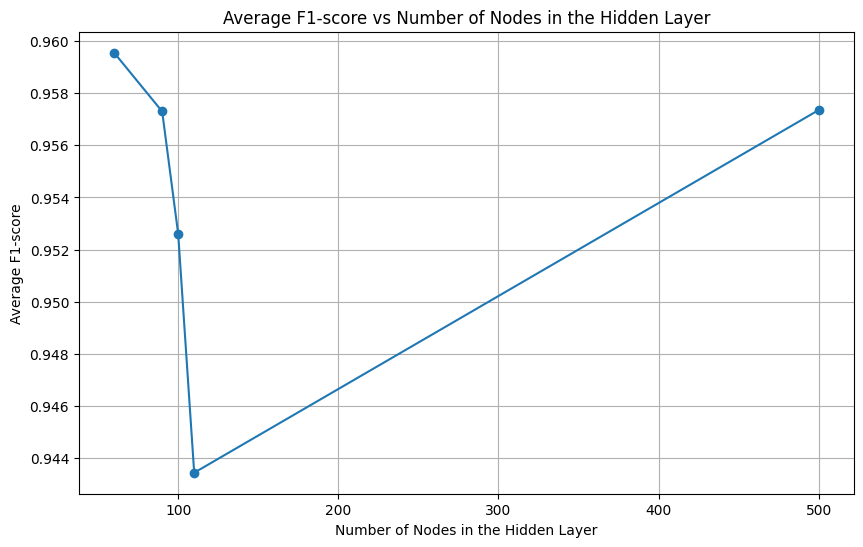

In [2]:
import matplotlib.pyplot as plt

# Number of nodes in the hidden layer
nodes = [60, 90, 100, 110, 500]

# Average F1-scores obtained during cross-validation
f1_scores = [0.9595580389728108, 0.9573021944374792, 0.9526011406303798, 0.9434265888408743, 0.9573558333951055]

plt.figure(figsize=(10, 6))
plt.plot(nodes, f1_scores, marker='o')
plt.title('Average F1-score vs Number of Nodes in the Hidden Layer')
plt.xlabel('Number of Nodes in the Hidden Layer')
plt.ylabel('Average F1-score')
plt.grid(True)
plt.show()


/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/l

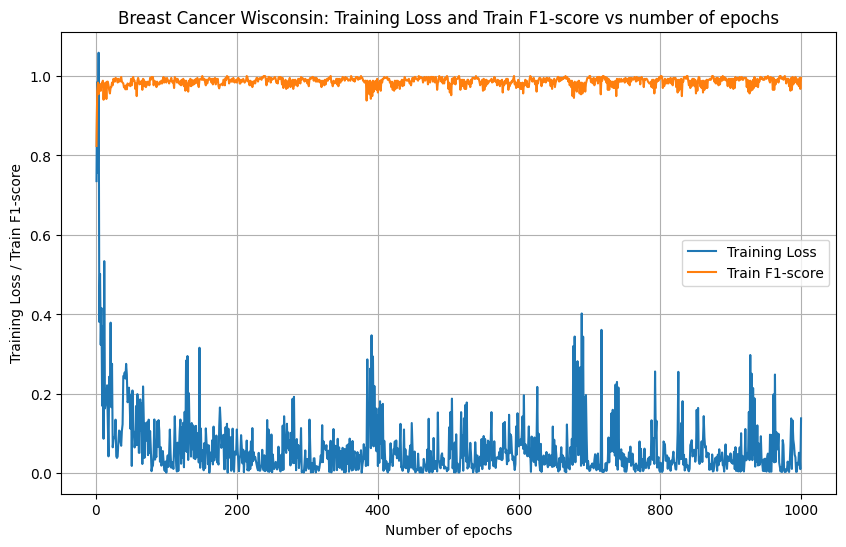

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Initialize lists to store the training loss and F1-score at each epoch
train_loss = []
train_f1 = []

# Train the model with the best number of nodes in the hidden layer
model = MLPClassifier(hidden_layer_sizes=(best_hidden_layer_size,), learning_rate_init=0.21, max_iter=1, warm_start=True, random_state=42)

# We will manually implement the epochs in order to store the training loss and F1-score at each epoch
for epoch in range(1000):
    model.fit(X_train, y_train)
    
    # Calculate the training loss and F1-score at this epoch
    train_loss.append(model.loss_)
    y_pred_train = model.predict(X_train)
    train_f1.append(f1_score(y_train, y_pred_train, average="macro"))

# Plot the training loss and F1-score vs number of epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), train_loss, label='Training Loss')
plt.plot(range(1, 1001), train_f1, label='Train F1-score')
plt.title('Breast Cancer Wisconsin: Training Loss and Train F1-score vs number of epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Training Loss / Train F1-score')
plt.legend()
plt.grid(True)
plt.show()
